In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
%matplotlib inline

# Чтение данных
training_set = pd.read_csv('titanic.csv')

# Определение признаков (X) и целевой переменной (y)
X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование категориальных признаков в бинарные
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Объединение тренировочных и тестовых данных
all_data = pd.concat([X_train_encoded, X_test_encoded])

# Создаем объект SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Преобразование с использованием SimpleImputer
all_data_imputed = pd.DataFrame(imputer.fit_transform(all_data), columns=all_data.columns)

# Разделение обратно на тренировочные и тестовые данные
X_train_imputed = all_data_imputed.iloc[:len(X_train_encoded), :]
X_test_imputed = all_data_imputed.iloc[len(X_train_encoded):, :]

# Создание и обучение модели
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test_imputed)

# Оценка эффективности модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



Accuracy: 0.8044692737430168
Confusion Matrix:
[[91 14]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Доля выживших: 0.3838383838383838


<Axes: xlabel='Survived', ylabel='count'>

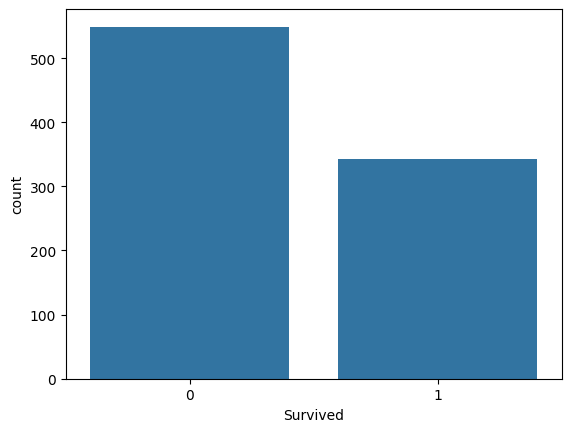

In [3]:
survival_ratio = training_set['Survived'].value_counts(normalize=True)
print("Доля выживших:", survival_ratio[1])
sns.countplot(x='Survived', data=training_set)

Доля выживших мужчин: 0.31871345029239767
Доля выживших женщин: 0.6812865497076024


<Axes: xlabel='Survived', ylabel='count'>

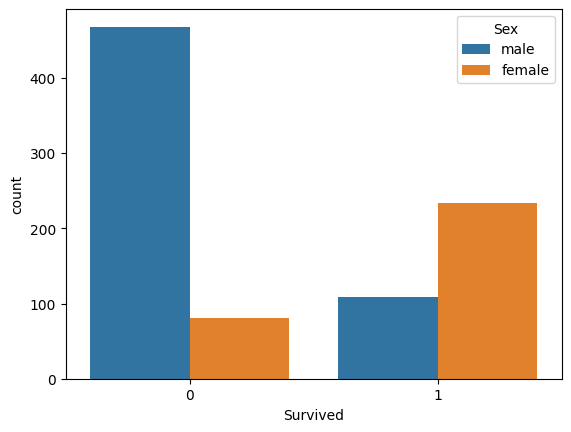

In [4]:
# Задание 3) Какова доля мужчин и женщин среди выживших?
survived_sex_ratio = training_set[training_set['Survived'] == 1]['Sex'].value_counts(normalize=True)
print("Доля выживших мужчин:", survived_sex_ratio['male'])
print("Доля выживших женщин:", survived_sex_ratio['female'])
sns.countplot(x='Survived', data=training_set, hue='Sex')

Число пассажиров в каждом классе:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
В самом многолюдном классе (3) было:
Мужчин: 347
Женщин: 144


<Axes: xlabel='Pclass', ylabel='count'>

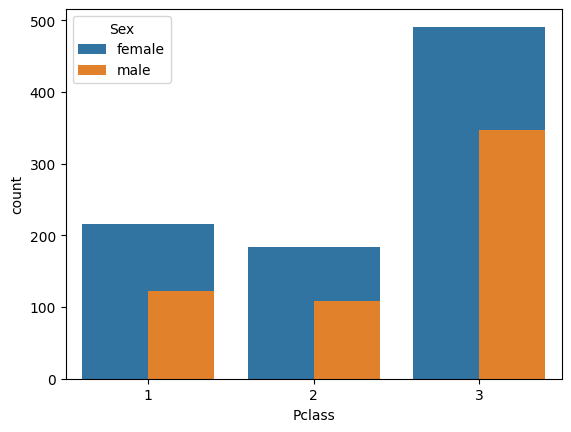

In [5]:
# Задание 4) Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?
passengers_per_class = training_set['Pclass'].value_counts()
print("Число пассажиров в каждом классе:")
print(passengers_per_class)

most_populous_class = passengers_per_class.idxmax()
sex_in_most_populous_class = training_set[training_set['Pclass'] == most_populous_class]['Sex'].value_counts()
print(f"В самом многолюдном классе ({most_populous_class}) было:")
print("Мужчин:", sex_in_most_populous_class['male'])
print("Женщин:", sex_in_most_populous_class['female'])

sns.countplot(x='Pclass', data=training_set)
sns.countplot(x='Pclass', data=training_set, hue='Sex')

In [6]:
#задание 5)Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.
training_set.drop(['Name', 'Ticket'], axis=1, inplace=True)

0.09606669176903894

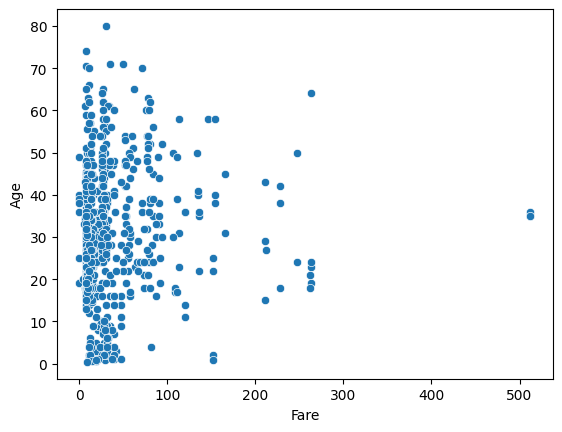

In [7]:
#Задание 6)Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров.
#Также проверьте наличие этой зависимости визуально
sns.scatterplot(x='Fare', y='Age', data=training_set)
corr = training_set['Fare'].corr(training_set['Age'])
corr

<Axes: xlabel='Survived', ylabel='Fare'>

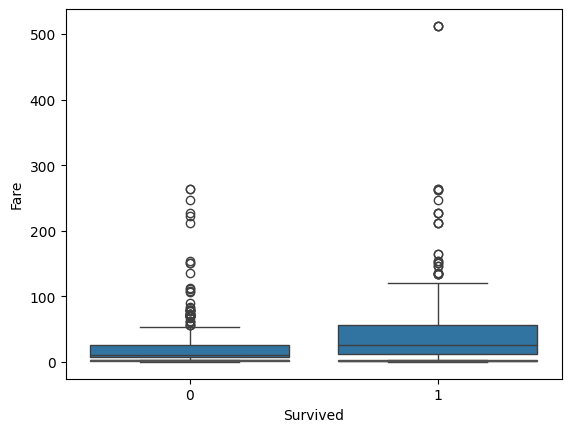

In [8]:
#Задание 7)Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?
sns.boxplot(x='Survived', y='Fare', data=training_set)
sns.boxplot(x='Survived', y='Pclass', data=training_set)

Минимальная сумма за проезд:
Embarked
C    4.0125
Q    6.7500
S    0.0000
Name: Fare, dtype: float64

Средняя сумма за проезд:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

Максимальная сумма за проезд:
Embarked
C    512.3292
Q     90.0000
S    263.0000
Name: Fare, dtype: float64


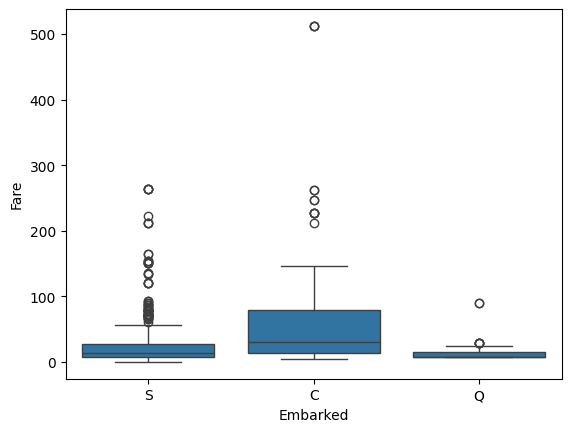

In [9]:
# Задание 8) Какова связь между стоимостью билета и портом отправления?
# Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд

sns.boxplot(x='Embarked', y='Fare', data=training_set)

min_fare = training_set.groupby('Embarked')['Fare'].min()
mean_fare = training_set.groupby('Embarked')['Fare'].mean()
max_fare = training_set.groupby('Embarked')['Fare'].max()

print("Минимальная сумма за проезд:")
print(min_fare)

print("\nСредняя сумма за проезд:")
print(mean_fare)

print("\nМаксимальная сумма за проезд:")
print(max_fare)


<Axes: xlabel='Fare', ylabel='Count'>

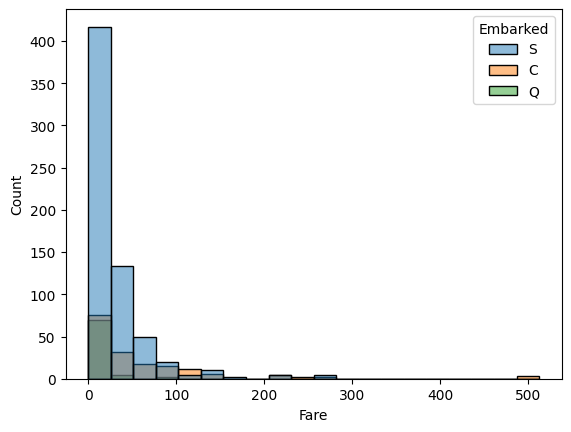

In [10]:
#Задание 9)Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.
sns.histplot(x='Fare', hue='Embarked', data=training_set, bins=20)

In [11]:
#Задание 10)Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? 
#Сколько из них выжило? 
#Какую долю составляет представленный набор данных от всей генеральной совокупности?
# Всего пассажиров Титаника
total_passengers = len(training_set)

# Количество выживших
survived_passengers = training_set['Survived'].sum()

# Доля представленного набора данных от всей генеральной совокупности
representation_ratio = len(X_train) / total_passengers

total_passengers, survived_passengers, representation_ratio

(891, 342, 0.7991021324354658)

In [12]:
#Задание 11)Разделите выборку на тестовую и обучающую части при помощи train_test_split(). 
#Изобразите на графиках распределение некоторых атрибутов и целевой переменной. 
#Насколько однородно получившееся разбиение?
from sklearn.model_selection import train_test_split

# Определение признаков (X) и целевой переменной (y)
X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#Задание 12)Сбалансируйте классы в исходном датасете двумя способами:
#Задание 13)Удалите лишние объекты мажоритарного класса (выбранные случайно)
# Определите мажоритарный класс
majority_class = training_set['Survived'].mode().iloc[0]

# Индексы объектов мажоритарного класса
majority_indices = training_set[training_set['Survived'] == majority_class].index

# Выберите случайные индексы для удаления
indices_to_remove = np.random.choice(majority_indices, size=int(0.5 * len(majority_indices)), replace=False)

# Удалите объекты мажоритарного класса
balanced_data1 = training_set.drop(indices_to_remove)


In [14]:
#Задание 12)Сбалансируйте классы в исходном датасете двумя способами:
#Задание 14)Добавьте в выборку дубликаты миноритарного класса
# Определите миноритарный класс
minority_class = 1 - majority_class

# Индексы объектов миноритарного класса
minority_indices = training_set[training_set['Survived'] == minority_class].index

# Добавьте дубликаты миноритарного класса
balanced_data2 = pd.concat([training_set, training_set.loc[minority_indices]])


In [15]:
# Задание 15)Проведите исследование эффективности простой модели классификации до и после данных преобразований.
# Пример создания и обучения модели до
# model_before = LogisticRegression()
# model_before.fit(X_train, y_train)
# y_pred_before = model_before.predict(X_test)

# model_after = LogisticRegression()
# model_after.fit(balanced_data1.drop('Survived', axis=1), balanced_data1['Survived'])
# y_pred_after = model_after.predict(X_test)


ValueError: could not convert string to float: 'male'

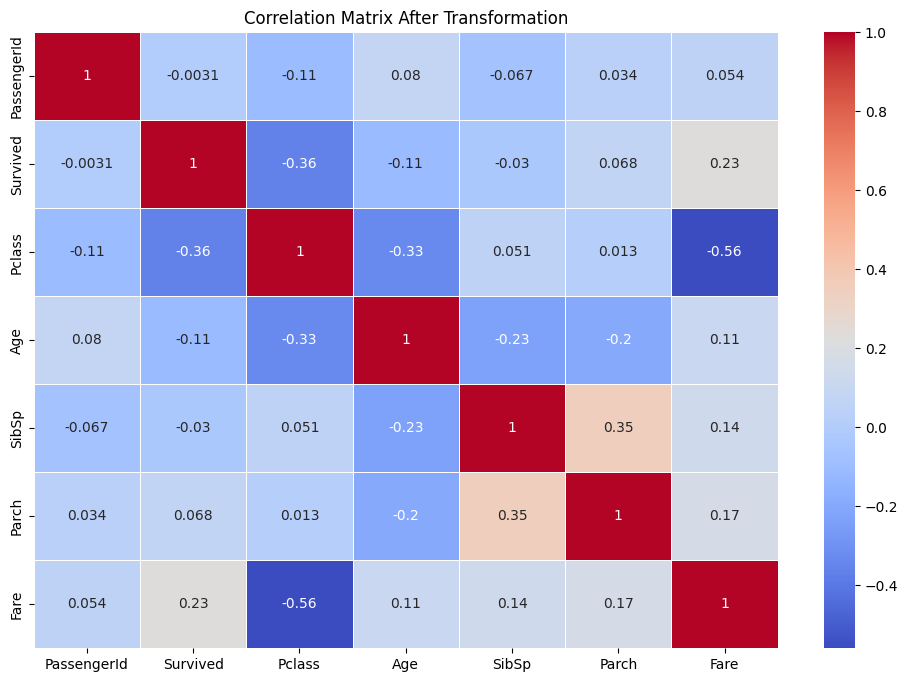

In [ ]:
#Задание 16)Постройте корреляционную матрицу признаков после преобразования данных. 
#Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.
# Построение корреляционной матрицы
# Отфильтровать только числовые данные
numeric_data = balanced_data1.select_dtypes(include=np.number)

# Построить корреляционную матрицу
correlation_matrix = numeric_data.corr()

# Построить тепловую карту корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix After Transformation")
plt.show()

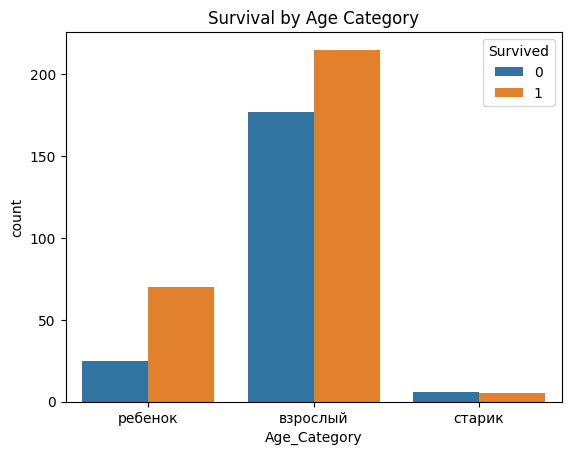

In [ ]:
#Задание 17)Проведите группировку данных по значению возраста. 
#Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". 
#Проведите анализ эффективности данного признака.
# Введите новый признак "возрастная категория"
bins = [0, 18, 60, np.inf]
labels = ['ребенок', 'взрослый', 'старик']

balanced_data1['Age_Category'] = pd.cut(balanced_data1['Age'], bins=bins, labels=labels)

# Анализ эффективности нового признака
sns.countplot(x='Age_Category', hue='Survived', data=balanced_data1)
plt.title("Survival by Age Category")
plt.show()